# Distribution of Log Fold Changes

For the purpose of replicating the *mRNA-Seq expression and MS3 proteomics profiling of human post-mortem BA9 brain tissue for Parkinson Disease and neurologically normal individuals* study by **Dumitriu A** et al. two different data sets were used, first the [data sets of differentially expressed genes](https://github.com/hariesramdhani/winter-internship-2017/blob/master/data/parkinsonDE.txt) from the analysis using DESeq2 (an R Bioconductor Package) and the [proteomics data set](https://github.com/hariesramdhani/winter-internship-2017/blob/master/data/protPDE.csv) provided by the author of the study.

To reproduce the same plot I used three different Python libraries `pandas` to work with the data sets, `seaborn` for the aesthetic plots and `matplotlib_venn` to generate Venn Diagram. I also tried to do the same thing in `R-Studio`.

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

os.chdir('data')

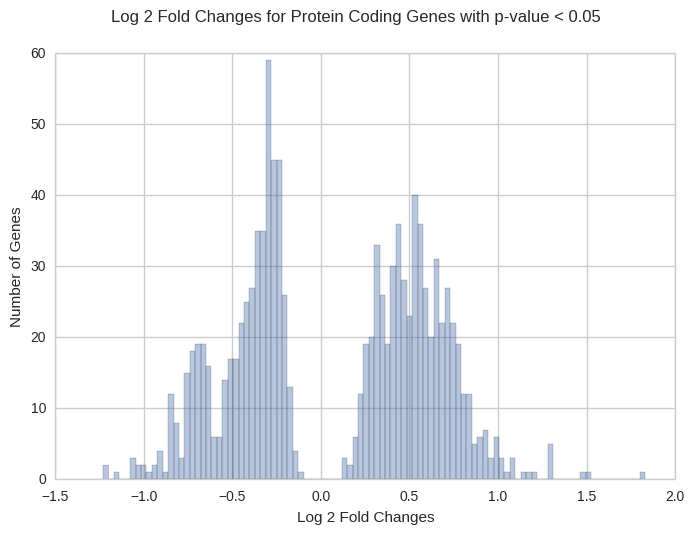

In [2]:
# Load the RNA-seq differentially expressed genes data
datPD = pd.read_table('parkinsonDE.txt')

# Slice the data by the adjusted p-value
lowPVal = datPD[datPD['padj'] < 0.05]
sns.set_style('whitegrid')

# Generate the distribution plot of the differentially expressed genes
log2FCData = lowPVal['log2FoldChange']
log2FCPlot = sns.distplot(log2FCData, kde=False, bins=100)

# Label the distribution plot
log2FCPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Genes')
sns.plt.suptitle('Log 2 Fold Changes for Protein Coding Genes with p-value < 0.05')

#ax.set_xtickslabel([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])

In [3]:
totalGenes = datPD.shape[0]
totalPVLGenes = lowPVal.shape[0]
PVLGenesRat = totalPVLGenes/totalGenes * 100
upRegGenes = len(lowPVal[lowPVal['log2FoldChange'] > 0])
downRegGenes = len(lowPVal['log2FoldChange']) - len(lowPVal[lowPVal['log2FoldChange'] > 0])
upRegGenesRat = upRegGenes/len(lowPVal['log2FoldChange']) * 100
downRegGenesRat = 100 - upRegGenesRat

print('Total number of genes: ' + str(totalGenes))
print('Total number of genes with p-value < 0.05: ' + str(totalPVLGenes) + ', ' + str(round(PVLGenesRat, 2)) + '%')
print('Number of up regulated genes: ' + str(upRegGenes) + ', ' + str(round(upRegGenesRat, 2)) + '%')
print('Number of down regulated genes: ' + str(downRegGenes) + ', ' + str(round(downRegGenesRat, 2)) + '%')

Total number of genes: 17580
Total number of genes with p-value < 0.05: 1095, 6.23%
Number of up regulated genes: 570, 52.05%
Number of down regulated genes: 525, 47.95%


Looking at the codes above we know that out of the total **17580** only **1095** or **6.23%** of them have p-values lower than 0.05. And out of the genes with p-value lower than 0.05 we know that **570** or **52.05%** of them are up regulated while **525** or **47.95%** of them are down regulated.

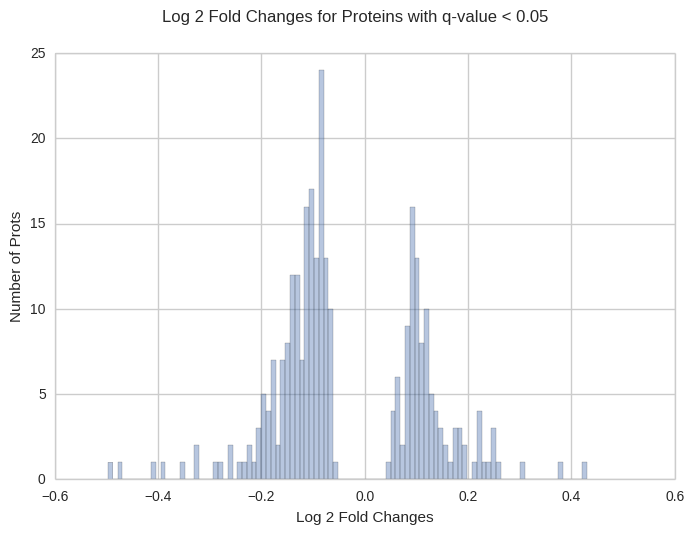

In [4]:
# Load the MS3 Proteomics data
protDatPD = pd.read_table('protPDE.csv')

# Slice the data by the FDR q-value
lowQVal = protDatPD[protDatPD['qvalue'] < 0.05]

# Generate the distribution plot of the proteomics data
log2FCPData = lowQVal['log2FoldChange']
log2FCPPlot = sns.distplot(log2FCPData, kde=False, bins=100)

# Label the distribution plot
log2FCPPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Prots')
sns.plt.suptitle('Log 2 Fold Changes for Proteins with q-value < 0.05')

In [5]:
totalProts = protDatPD.shape[0]
totalPVLProts = lowQVal.shape[0]
PVLProtsRat = totalPVLProts/totalProts * 100
upRegProts = len(lowQVal[lowQVal['log2FoldChange'] > 0])
downRegProts = len(lowQVal['log2FoldChange']) - len(lowQVal[lowQVal['log2FoldChange'] > 0])
upRegProtsRat = upRegProts/len(lowQVal['log2FoldChange']) * 100
downRegProtsRat = 100 - upRegProtsRat

print('Total number of Proteins: ' + str(totalProts))
print('Total number of Proteins with q-value < 0.05: ' + str(totalPVLProts) + ', ' + str(round(PVLProtsRat, 2)) + '%')
print('Number of up regulated Proteins: ' + str(upRegProts) + ', ' + str(round(upRegProtsRat, 2)) + '%')
print('Number of down regulated Proteins: ' + str(downRegProts) + ', ' + str(round(downRegProtsRat, 2)) + '%')

Total number of Proteins: 3558
Total number of Proteins with q-value < 0.05: 283, 7.95%
Number of up regulated Proteins: 106, 37.46%
Number of down regulated Proteins: 177, 62.54%


Looking at the codes above we know that out of the total of **3558** only **283** or **7.95%** of them have p-values lower than 0.05. And out of the genes with p-value lower than 0.05 we know that **106** or **37.46%** of them are up regulated while **177** or **62.54%** of them are down regulated.

In [6]:
# List the names of RNA-seq protein coding genes and MS3 proteins with p-val < 0.05 and q-val < 0.05 respectively
geneNames = list(lowPVal['symbol'])
protNames = list(lowQVal['Symbol'])

# Array of the intersection between 
intersectGPs = []

# Compare the list of proteins and genes
for protName in protNames:
    if protName in geneNames:
        intersectGPs.append(protName)

print('Here are the genes/proteins that exist in both subset: ' + ', '.join(intersectGPs))

Here are the genes/proteins that exist in both subset: ACTA2, PRUNE2, ALDH1A1, SLC4A8, CRELD1, VAPB, GFM1, NDUFS1, MTX3, OPA1


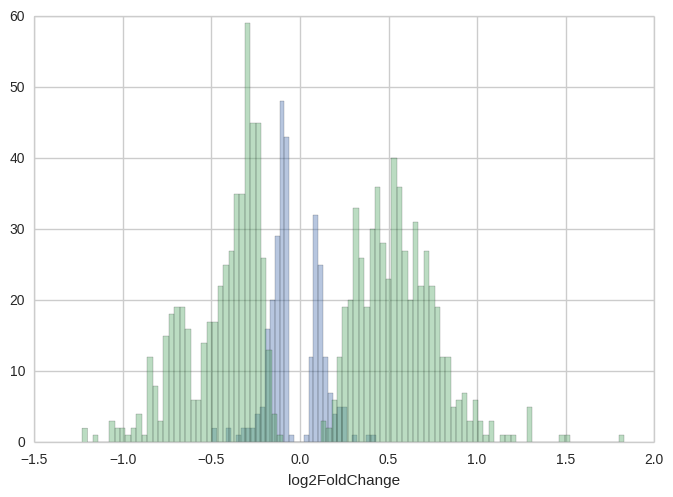

In [7]:
# Compare the RNA-seq protein coding genes and MS3 proteins distribution plots
sns.distplot(log2FCPData, kde=False, bins=34)
sns.distplot(log2FCData, kde=False, bins=100)

The plot above are the comparison between the *<span style="color:green">RNA-seq protein-coding genes</span>* and *<span style='color:blue'>MS3 proteins</span>*. Look at how small the distribution of *<span style='color:blue'>MS3 proteins</span>* compared to the *<span style="color:green">RNA-seq protein-coding genes</span>*

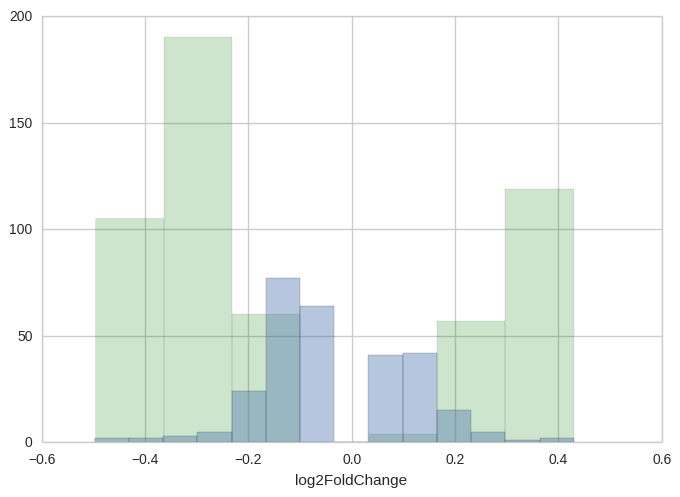

In [8]:
# Find the members in the intersection between the two plots
plotInter = lowPVal[min(lowQVal['log2FoldChange']) <= lowPVal['log2FoldChange']]
plotInter = plotInter[max(lowQVal['log2FoldChange']) >= plotInter['log2FoldChange']]

# Generate the distribution plot
sns.distplot(plotInter['log2FoldChange'], kde=False, color='green', hist_kws={'alpha':0.2})
sns.distplot(log2FCPData, kde=False)

There are **535** RNA-seq genes that lie between the minimum and maximum log2 fold change of proteomics genes 

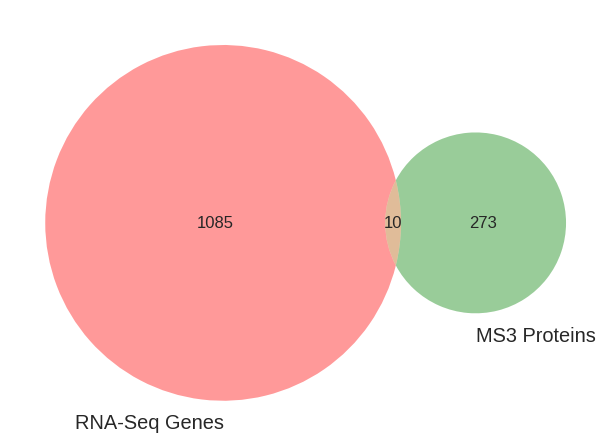

In [9]:
# Create subsets for both MS3 proteins and RNA-Seq protein coding genes
protRNA = [len(geneNames)-len(intersectGPs), len(protNames)-len(intersectGPs), len(intersectGPs)]

# Generate the Venn diagram
protRNASubVenn = venn2(protRNA, ['RNA-Seq Genes', 'MS3 Proteins'])


Comparing the RNA-Seq Genes and Proteomics Genes, it's found that they have **10** similar genes, they are; *ACTA2, PRUNE2, ALDH1A1, SLC4A8, CRELD1, VAPB, GFM1, NDUFS1, MTX3, OPA1*

In [10]:
# List the names of all RNA-seq and proteomics genes in data set respectively
allGeneNames = list(datPD['symbol'])
allProtNames = list(protDatPD['Symbol'])

# Array of the intersection between the them
allIntersectGPs = []

# Compare the list of the total RNA-seq genes and Proteomics Genes 
for allProtName in allProtNames:
    if allProtName in allGeneNames:
        allIntersectGPs.append(allProtName)

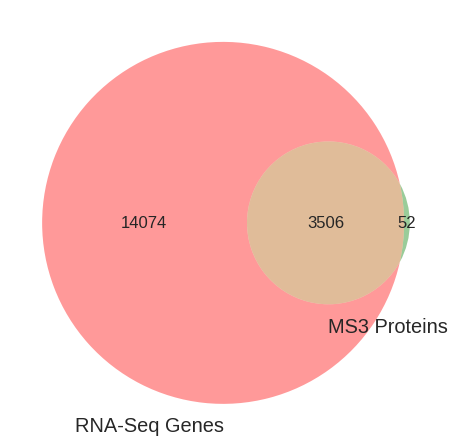

In [11]:
# Create subsets for the total of both proteomic genes and RNA-Seq genes
totProtRNA = [len(allGeneNames)-len(allIntersectGPs), len(allProtNames)-len(allIntersectGPs),
          len(allIntersectGPs)]

# Genereate the Venn diagram
totProtRNAVenn = venn2(totProtRNA, ['RNA-Seq Genes', 'MS3 Proteins'])

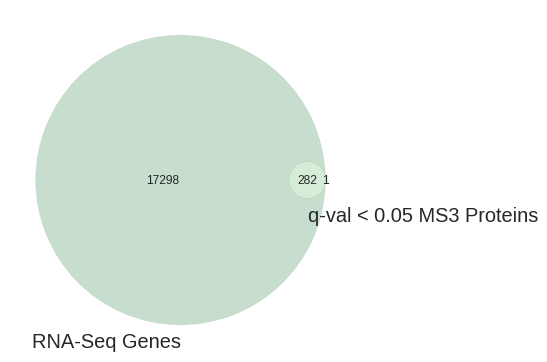

In [12]:
# Create intersection between proteomics genes with q-value < 0.05 and total RNA-seq genes
intersectProtRNAs = len(set(lowQVal['Symbol']).intersection(datPD['symbol']))

# Plot the sets and intersection
with sns.plotting_context('paper', font_scale=0.9):
    intProtRNAs = [datPD.shape[0] - intersectProtRNAs, lowQVal.shape[0] - intersectProtRNAs, intersectProtRNAs]
    intProtRNAsVenn = venn2(intProtRNAs, ['RNA-Seq Genes', 'q-val < 0.05 MS3 Proteins'])
    
    intProtRNAsVenn.get_patch_by_id('10').set_color('#73AB84')
    intProtRNAsVenn.get_patch_by_id('11').set_color('#99D19C')

In [13]:
# Find the different genes between two sets
diffProtRNAs = set(lowQVal['Symbol']).difference(datPD['symbol'])
diffProtRNAs

{'RPL10P16'}

Looking at the venn diagram above we can learn that out of 283 significantly differentially abundant protein, one was missing from the RNA-Seq data set. This gene is *RPL10P16* which is a [*ribosomal protein L10 pseudogene 16*](https://www.ncbi.nlm.nih.gov/gene/284393)

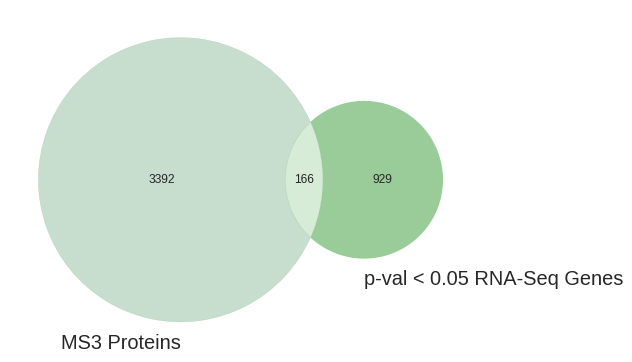

In [14]:
# Create intersection between proteomics genes with q-value < 0.05 and total RNA-seq genes
intersectRNAsProt = len(set(lowPVal['symbol']).intersection(protDatPD['Symbol']))

# Plot the sets and intersection
with sns.plotting_context('paper', font_scale=0.9):
    intProtRNAs = [protDatPD.shape[0] - intersectRNAsProt, lowPVal.shape[0] - intersectRNAsProt, intersectRNAsProt]
    intProtRNAsVenn = venn2(intProtRNAs, ['MS3 Proteins', 'p-val < 0.05 RNA-Seq Genes'])
    
    intProtRNAsVenn.get_patch_by_id('10').set_color('#73AB84')
    intProtRNAsVenn.get_patch_by_id('11').set_color('#99D19C')

Out of the 1095 RNA-seq genes with p-value < 0.05 only 166 of them are present in Proteomics Gene data set.

In [15]:
# Return five genes with the highest adjusted p-values in RNA-seq genes
lowPVal.sort_values(by='padj', ascending=True).head()

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000173110.6,HSPA6,1306.723881,1.831929,0.238948,7.666642,1.765574e-14,3.103879e-10
1,ENSG00000123689.5,G0S2,130.156793,1.506402,0.221366,6.805015,1.010386e-11,8.881295e-08
2,ENSG00000204389.7,HSPA1A,10801.717216,1.492569,0.226556,6.588079,4.455545e-11,2.610949e-07
3,ENSG00000106211.8,HSPB1,9679.155270,1.296490,0.206143,6.289276,3.189502e-10,1.401786e-06
4,ENSG00000137731.8,FXYD2,8.746807,0.979849,0.161285,6.075249,1.237955e-09,3.627207e-06


In [16]:
# Return five genes with the lowest adjusted p-values, p-values close to 0.05 in RNA-seq genes
lowPVal.sort_values(by='padj', ascending=True).tail()

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1089,ENSG00000131725.9,WDR44,610.765292,-0.292800,0.098970,-2.958470,0.003092,0.049839
1090,ENSG00000155008.9,APOOL,40.094644,-0.560198,0.189410,-2.957593,0.003101,0.049839
1091,ENSG00000198440.5,ZNF583,239.175613,-0.200195,0.067683,-2.957843,0.003098,0.049839
1092,ENSG00000211460.7,TSN,2097.474302,-0.148605,0.050247,-2.957498,0.003101,0.049839
1094,ENSG00000120500.13,ARR3,6.382630,-0.551623,0.186536,-2.957194,0.003105,0.049843


In [17]:
# Return five genes with the highest log2 Fold Changes in RNA-seq genes
lowPVal.sort_values(by='log2FoldChange', ascending=False).head()

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000173110.6,HSPA6,1306.723881,1.831929,0.238948,7.666642,1.765574e-14,3.103879e-10
1,ENSG00000123689.5,G0S2,130.156793,1.506402,0.221366,6.805015,1.010386e-11,8.881295e-08
2,ENSG00000204389.7,HSPA1A,10801.717216,1.492569,0.226556,6.588079,4.455545e-11,2.610949e-07
5,ENSG00000152049.5,KCNE4,280.985174,1.309400,0.215355,6.080184,1.200451e-09,3.627207e-06
3,ENSG00000106211.8,HSPB1,9679.155270,1.296490,0.206143,6.289276,3.189502e-10,1.401786e-06


In [18]:
# Retrieve all heat shock proteins coding genes from the RNA-seq genes
lowPVal.loc[lowPVal['symbol'].str.startswith('HS')].sort_values(by='log2FoldChange', ascending=False)

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000173110.6,HSPA6,1306.723881,1.831929,0.238948,7.666642,1.765574e-14,3.103879e-10
2,ENSG00000204389.7,HSPA1A,10801.717216,1.492569,0.226556,6.588079,4.455545e-11,2.610949e-07
3,ENSG00000106211.8,HSPB1,9679.155270,1.296490,0.206143,6.289276,3.189502e-10,1.401786e-06
7,ENSG00000204388.5,HSPA1B,8858.491555,1.285557,0.216650,5.933799,2.960042e-09,6.504691e-06
106,ENSG00000197723.3,HSPB9,7.074953,0.908814,0.212102,4.284807,1.828982e-05,3.014605e-03
416,ENSG00000176387.6,HSD11B2,121.030328,0.739473,0.209762,3.525292,4.230166e-04,1.783365e-02
304,ENSG00000204390.8,HSPA1L,213.030058,0.524993,0.142697,3.679071,2.340850e-04,1.352712e-02
938,ENSG00000099377.9,HSD3B7,212.173018,0.448933,0.147934,3.034692,2.407817e-03,4.508405e-02
510,ENSG00000170276.4,HSPB2,78.015199,0.442028,0.129726,3.407409,6.558268e-04,2.248155e-02
931,ENSG00000185122.6,HSF1,1965.340229,0.282086,0.092811,3.039362,2.370796e-03,4.475527e-02


Most of the **heatshock proteins** coding genes in Parkinson's Disease are up regulated except for one gene, <span style='color:red'>HSPA14</span> it is down regulated.

In [19]:
# Return five genes with the lowest log2 Fold Changes in RNA-seq genes
lowPVal.sort_values(by='log2FoldChange', ascending=False).tail()

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
44,ENSG00000132130.7,LHX1,44.082944,-1.065873,0.228346,-4.667793,3.044528e-06,0.001189
61,ENSG00000174948.5,GPR149,8.096781,-1.076434,0.238691,-4.509745,6.490550e-06,0.001787
19,ENSG00000008086.6,CDKL5,98.177117,-1.147549,0.221689,-5.176386,2.262252e-07,0.000189
20,ENSG00000145863.6,GABRA6,168.377756,-1.227237,0.236847,-5.181570,2.200256e-07,0.000189
18,ENSG00000086570.8,FAT2,709.721960,-1.230213,0.235039,-5.234071,1.658167e-07,0.000153


In [20]:
# Return five genes with the highest q-values in MS3 proteins
lowQVal.sort_values(by='qvalue', ascending=True).head()

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
0,CRIP2,0.222368,1.166647,7.830000e-08,0.000164,0.000105
1,SYT12,-0.190957,0.876025,9.190000e-08,0.000164,0.000105
2,DPYSL3,0.221558,1.165992,1.570000e-07,0.000187,0.000120
3,SYT1,-0.324413,0.798623,2.690000e-07,0.000203,0.000131
4,RPH3A,-0.185331,0.879447,2.860000e-07,0.000203,0.000131


In [21]:
# Return five genes with the lowest q-values in MS3 proteins
lowQVal.sort_values(by='qvalue', ascending=True).tail()

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
280,OTUB1,0.051054,1.036022,0.006117,0.077218,0.04962
281,PRKAB1,-0.083754,0.943599,0.006131,0.077218,0.04962
278,PTMS,-0.154193,0.898635,0.006064,0.077218,0.04962
279,NTM,-0.093767,0.937073,0.006078,0.077218,0.04962
282,S100A1,-0.205186,0.867427,0.006142,0.077218,0.04962


In [22]:
# Return five genes with the highest log2 fold change in MS3 proteins
lowQVal.sort_values(by='log2FoldChange', ascending=False).head()

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
270,HBA1,0.429850,1.347094,0.005659,0.074301,0.047746
135,AQP1,0.382980,1.304033,0.001424,0.037185,0.023895
165,CA1,0.308048,1.238031,0.002296,0.049218,0.031627
9,MAPK3,0.255332,1.193610,0.000003,0.000992,0.000638
223,VIM,0.253675,1.192240,0.003974,0.063130,0.040567


In [23]:
# Return five genes with the lowest log2 fold change in MS3 proteins
lowQVal.sort_values(by='log2FoldChange', ascending=False).tail()

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
34,CPLX1,-0.357264,0.780644,0.000066,0.006726,0.004322
120,ATPIF1,-0.391989,0.762078,0.001193,0.035086,0.022546
122,SYT2,-0.405021,0.755225,0.001234,0.035690,0.022934
237,KRT9,-0.470754,0.721587,0.004696,0.069525,0.044677
89,PVALB,-0.497074,0.708542,0.000663,0.026170,0.016816


In [24]:
# Create empty arrays for new data set containing fold changes and log2 fold changes value
RNASeql2FoldCh = []
protl2FoldCh = []


for intersectGP in intersectGPs:
    RNASeql2FoldCh.append(float(lowPVal['log2FoldChange'][lowPVal['symbol'] == intersectGP]))
    protl2FoldCh.append(float(lowQVal['log2FoldChange'][lowQVal['Symbol'] == intersectGP]))

# Convert the log2 fold changes to fold change
RNASeqFoldCh = [2**i for i in RNASeql2FoldCh]
protFoldCh = [2**i for i in protl2FoldCh]

# Establish new data sets containing fold changes and log2 fold changes values
GPl2FoldChData = {'symbol': intersectGPs, 'RNASl2FoldCh': RNASeql2FoldCh, 'protl2FoldCh':protl2FoldCh,
                 'RNASeqFoldCh': RNASeqFoldCh, 'protFoldCh':protFoldCh}
GPl2FoldChDF = pd.DataFrame(GPl2FoldChData, columns=['symbol', 'RNASl2FoldCh', 'protl2FoldCh',
                                                     'RNASeqFoldCh', 'protFoldCh'])

GPl2FoldChDF

,symbol,RNASl2FoldCh,protl2FoldCh,RNASeqFoldCh,protFoldCh
0,ACTA2,-0.714480,0.106885,0.609425,1.076901
1,PRUNE2,-0.355359,-0.115702,0.781675,0.922933
2,ALDH1A1,-0.537699,-0.241008,0.688869,0.846154
3,SLC4A8,-0.660308,-0.193625,0.632743,0.874406
4,CRELD1,0.334780,-0.107293,1.261185,0.928328
5,VAPB,-0.219866,-0.097798,0.858645,0.934458
6,GFM1,-0.257380,-0.098431,0.836606,0.934048
7,NDUFS1,-0.354429,-0.103463,0.782179,0.930796
8,MTX3,-0.605690,-0.117924,0.657157,0.921513
9,OPA1,-0.283314,-0.068977,0.821701,0.953314


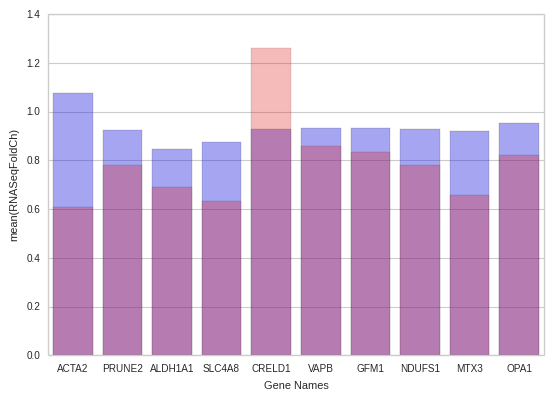

In [25]:
# Plot the different between fold changes in teh intersection of proteomics and rna-seq data sets
with sns.plotting_context('paper', font_scale=0.9):
    ax = sns.barplot(x='symbol', y='protFoldCh', data=GPl2FoldChDF, color='blue', alpha=0.4)
    ax2 = sns.barplot(x='symbol', y='RNASeqFoldCh', data=GPl2FoldChDF, color='red', alpha=0.3)
    ax2.set(xlabel='Gene Names')

Looking at the bar chart above we can learn that most of the fold changes in the *<span style="color:blue">protein data set</span>* is relatively higher than those in *<span style="color:red">RNA seq data set</span>* except for one gene, *CRELD1*.

In [41]:
lowQVal[lowQVal['Symbol'].str.contains('SNCA')]

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
247,SNCA,0.090126,1.064463,0.004846,0.069525,0.044677
